In [1]:
'''Import statements and settings'''
%matplotlib inline

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import matplotlib.gridspec as gridspec

import scipy
import scipy.constants
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import shapiro

import random

import data_util as util


In [ ]:
'''Pull in data -- standardized'''


# Set root directory
sim_type = "s"  # ebind, lig_num, or s
sim_num = 1  # binding energy (2-20), ligand number (100-1100), or solvent parameter s (0.1-1.0)
sim_len = 25  # sim_len million timesteps
short = True
output = "results/sims/%s/" % sim_type  # output directory root
coords2 = False  # whether or not to calculate coords 2 (which supplands calculation of coords)
if short:
    root = "sims_out/%s/short/%s%d/" % (sim_type, sim_type, sim_num)
else:
    # FOR extended roots only, you must manually enter the sim length
    root = "sims_out/%s/extended/%s%d_%dmil/" % (sim_type, sim_type, sim_num, sim_len)

# Pull in coords.dmp and log.lammps
first_tstep, last_tstep, tstep_size = 10000, sim_len*1000000+10000, 5000  # params same for coords and thermo
# coords.dmp
dmp = root + "coords.dmp"
coords_dat = "results/sims/%s/out/%s%d/coords.dat" % (sim_type, sim_type, sim_num)
tot_lns, lns_per_time, bad_lns, tsteps_on = sim_len*2*1000+11, 10, 9, True
coords_cols = {
    0: "c_coords"
}
coords_data = util.dmp_to_dat(dmp, coords_dat, tot_lns, lns_per_time, bad_lns, coords_cols, tsteps_on=tsteps_on, 
                              first_tstep=first_tstep, last_tstep=last_tstep, tstep_size=tstep_size)
# log.lammps
thermo = root + "log.lammps"
thermo_dat = output + "out/%s%d/thermo.dat" % (sim_type, sim_num)
header_len, last_ln, tot_len = 233, sim_len*2*100+266 - 32, sim_len*2*100+266
thermo_cols = {  
    1: "Temp",  
    2: "E_pair",  
    3: "E_mol",  
    4: "TotEng",  
    #5: "Press"
}
thermo_data = util.thermo_to_dat(thermo, thermo_dat, header_len, last_ln, tot_len, thermo_cols, first_tstep, 
                                 last_tstep, tstep_size)

#Hacky -- lazy, so just converting these to dictionaries since everything was written for this
# Convert to dictionary of numpy arrays:
thermo_data = thermo_data.to_dict("series")
for key in thermo_data:
    thermo_data[key] = np.array(thermo_data[key].values)
coords_data = coords_data.to_dict("series")
for key in coords_data:
    coords_data[key] = np.array(coords_data[key].values)

# Reduce size
reduce_size = False
div = 5
if reduce_size:
    for key in thermo_data:
        og_array = thermo_data[key]
        new_list = []
        for idx, element in enumerate(og_array):
                if idx % div == 0:
                    new_list.append(element)

        thermo_data[key] = np.array(new_list)
    for key in coords_data:
        og_array = coords_data[key]
        new_list = []
        for idx, element in enumerate(og_array):
                if idx % div == 0:
                    new_list.append(element)

        coords_data[key] = np.array(new_list)

print("Number of timesteps: ", len(thermo_data["timestep"]))


In [240]:
'''Pull in data -- not standardized'''


# Set root directory (MUST INCLUDE / AT THE END)
sim_num = 1
root = "sims_out/s/short/s%d/" % sim_num
output = "results/sims/s/"

sim_type = "lig"  # ebind, lig_num, or s
#sim_num = 2  # binding energy (2-20), ligand number (100-1100), or solvent parameter s (0.1-1.0)
sim_len = 5  # sim_len million timesteps


# Pull in coords.dmp and log.lammps

# coords.dmp
first_tstep = 10000
last_tstep = 5010000
tstep_size = 5000  

dmp = root + "coords.dmp"
coords_dat = "results/sims/%s/out/%s%d/coords.dat" % (sim_type, sim_type, sim_num)
tot_lns = 10011
lns_per_time = 10
bad_lns = 9
tsteps_on = True
coords_cols = {
    0: "c_coords"
}
coords_data = util.dmp_to_dat(dmp, coords_dat, tot_lns, lns_per_time, bad_lns, coords_cols, tsteps_on=tsteps_on, first_tstep=
                         first_tstep, last_tstep=last_tstep, tstep_size=tstep_size)

# log.lammps
first_tstep = 10000
last_tstep = 5010000
tstep_size = 5000 

thermo = root + "log.lammps"
thermo_dat = "results/sims/%s/out/%s%d/thermo.dat" % (sim_type, sim_type, sim_num)
header_len = 238
last_ln = 1239
tot_len = 1271
thermo_cols = {  
    1: "Temp",  
    2: "E_pair",  
    3: "E_mol",  
    4: "TotEng",  
    #5: "Press"
}
thermo_data = util.thermo_to_dat(thermo, thermo_dat, header_len, last_ln, tot_len, thermo_cols, first_tstep, last_tstep, 
                                 tstep_size)


#Hacky -- lazy, so just converting these to dictionaries since everything was written for this
# Convert to dictionary of numpy arrays:
thermo_data = thermo_data.to_dict("series")
for key in thermo_data:
    thermo_data[key] = np.array(thermo_data[key].values)
coords_data = coords_data.to_dict("series")
for key in coords_data:
    coords_data[key] = np.array(coords_data[key].values)

# Reduce size
reduce_size = False
div = 5
if reduce_size:
    for key in thermo_data:
        og_array = thermo_data[key]
        new_list = []
        for idx, element in enumerate(og_array):
                if idx % div == 0:
                    new_list.append(element)

        thermo_data[key] = np.array(new_list)
#     for key in coords_data:
#         og_array = coords_data[key]
#         new_list = []
#         for idx, element in enumerate(og_array):
#                 if idx % div == 0:
#                     new_list.append(element)

#         coords_data[key] = np.array(new_list)

print("Number of timesteps: ", len(thermo_data["timestep"]))


Number of timesteps:  1001


FileNotFoundError: [Errno 2] No such file or directory: 'results/sims/s/figures/lig1/raw_PE.png'

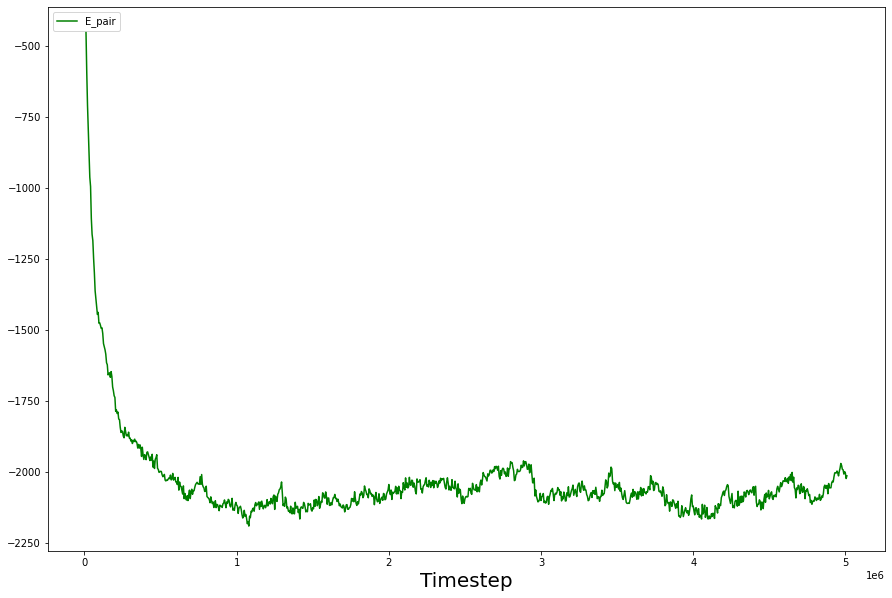

In [241]:
### STEP 1: TEST IF EQ HAPPENS
'''Leg 1: Visual Inspection'''


block_width = (len(thermo_data["timestep"])-1)/10 + 1
thermo_on = False
avg_end_on = False

timesteps = thermo_data["timestep"]
pe = thermo_data["E_pair"]
coord = coords_data["c_coords"]
#print(len(pe), len(coord), len(timesteps))
assert len(pe) == len(coord) and len(coord) == len(timesteps)
steps = [i for i in range(len(pe))]

# Make plots
# Basic plots
# Plot thermo data
if thermo_on:
    fig, ax = plt.subplots(figsize=[15, 10])
    #ax.plot(timesteps, thermo_data["Press"], label="Pressure", color="red", linestyle="solid")
    # BUG: press column contains "e-05", which pd.fwf won't read. so canceling press for now
    ax.plot(timesteps, thermo_data["Temp"], label="Temperature", color="orange", linestyle="solid")
    ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
    ax.plot(timesteps, thermo_data["E_mol"], label="E_mol", color="blue", linestyle="solid")
    ax.plot(timesteps, thermo_data["TotEng"], label="Total Energy", color="purple", linestyle="solid")
    ax.set_xlabel("Timestep", fontsize=20)
    plt.legend(loc="upper left")
    plt.savefig(output + "figures/%s%d/thermo.png" % (sim_type, sim_num), bbox_inches="tight")
    plt.show()
# Plot e_pair
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig(output + "figures/%s%d/raw_PE.png" % (sim_type, sim_num), bbox_inches="tight")
plt.show()
# Plot coord number
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coords_data["timestep"], coords_data["c_coords"], label="Coordination Num", color="orange", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig(output + "figures/%s%d/raw_coord.png" % (sim_type, sim_num), bbox_inches="tight")
plt.show()


if avg_end_on:
    # Average to the end
    # PE
    avg_pes = []
    for step in steps:
        pe_eq = np.delete(pe, steps[:step])
        avg_pe = np.average(pe_eq)
        avg_pes.append(avg_pe)
    fig, ax = plt.subplots(figsize=[15, 10])
    ax.plot(timesteps, avg_pes, label="avg_pes", color="black", linestyle="solid")
    ax.set_xlabel("Timestep", fontsize=20)
    plt.legend(loc="upper left")
    plt.savefig(output + "figures/%s%d/PE_avg_end.png" % (sim_type, sim_num), bbox_inches="tight")
    plt.show()
    # Coord
    avg_coords = []
    for step in steps:
        coord_eq = np.delete(coord, steps[:step])
        avg_coord = np.average(coord_eq)
        avg_coords.append(avg_coord)
    fig, ax = plt.subplots(figsize=[15, 10])
    ax.plot(timesteps, avg_coords, label="avg_coords", color="black", linestyle="solid")
    ax.set_xlabel("Timestep", fontsize=20)
    plt.legend(loc="upper left")
    plt.savefig(output + "figures/%s%d/coord_avg_end.png" % (sim_type, sim_num), bbox_inches="tight")
    plt.show()

# Block stats
pe_avgs, pe_rs, timesteps_raw = util.plot_block_stats(sim_type, block_width, pe, timesteps, "PE_tenth-", sim_num, 
                                                      output)
coord_avgs, coord_rs, _ = util.plot_block_stats(sim_type, block_width, coord, timesteps, "coord_tenth-", sim_num, 
                                                output)


In [ ]:
'''Leg 2: Case 1 BF check'''


# r to the end: raw
fig, ax = plt.subplots(figsize=[15, 10])
ax.set_xlabel("Timestep", fontsize=20)
ax.set_ylim(-1,1)

# PE
pe_rs = []
for step in steps:
    _, _, r_value, _, _ = scipy.stats.linregress(np.delete(timesteps, steps[:step]), np.delete(pe, steps[:step]))
    pe_rs.append(r_value)
ax.plot(timesteps, pe_rs, label="pe", color="red", linestyle="solid")
# Coord
coord_rs = []
for step in steps:
    _, _, r_value, _, _ = scipy.stats.linregress(np.delete(timesteps, steps[:step]), np.delete(coord, steps[:step]))
    coord_rs.append(r_value)
ax.plot(timesteps, coord_rs, label="coord", color="blue", linestyle="solid")
plt.savefig(output + "figures/%s%d/leg2.png" % (sim_type, sim_num), bbox_inches="tight")
plt.legend(loc="upper left")
plt.show()


# r to the end: blocks
fig, ax = plt.subplots(figsize=[15, 10])
ax.set_xlabel("Timestep", fontsize=20)
ax.set_ylim(-1,1)

block_steps = [i for i in range(len(timesteps_raw))]

# PE
pe_rs_b = []
for block_step in block_steps:
    _, _, r_value, _, _ = scipy.stats.linregress(np.delete(timesteps_raw, block_steps[:block_step]), 
                                                 np.delete(pe_avgs, block_steps[:block_step])) 
    pe_rs_b.append(r_value)
ax.plot(timesteps_raw, pe_rs_b, label="pe blocks", color="brown", linestyle="solid")
# Coord
coord_rs_b = []
for block_step in block_steps:
    _, _, r_value, _, _ = scipy.stats.linregress(np.delete(timesteps_raw, block_steps[:block_step]), 
                                                 np.delete(coord_avgs, block_steps[:block_step]))
    coord_rs_b.append(r_value)
ax.plot(timesteps_raw, coord_rs_b, label="coord blocks", color="grey", linestyle="solid")

plt.legend(loc="upper left")
plt.show()


In [ ]:
'''Leg 3: Case 2 sensing'''


block_width = (len(thermo_data["timestep"])-1)/4 + 1

# Block stats: 1/4 r
pe_avgs, pe_rs, timesteps_raw = util.plot_block_stats(sim_type, block_width, pe, timesteps, "PE_fourth-", sim_num, 
                                                      output, avgs_on=False, rs_on=True)
coord_avgs, coord_rs, _ = util.plot_block_stats(sim_type, block_width, coord, timesteps, "coord_fourth-", sim_num, 
                                                output, avgs_on=False, rs_on=True)

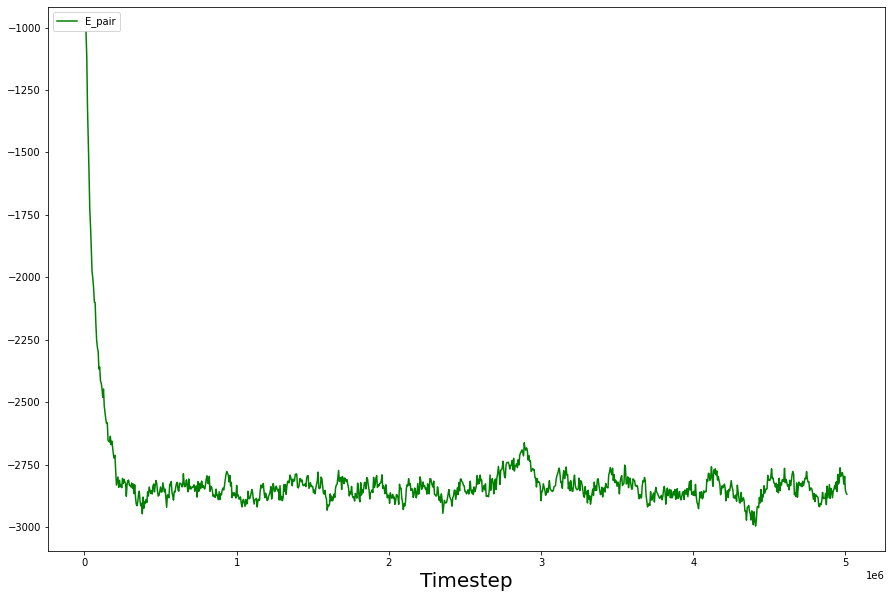

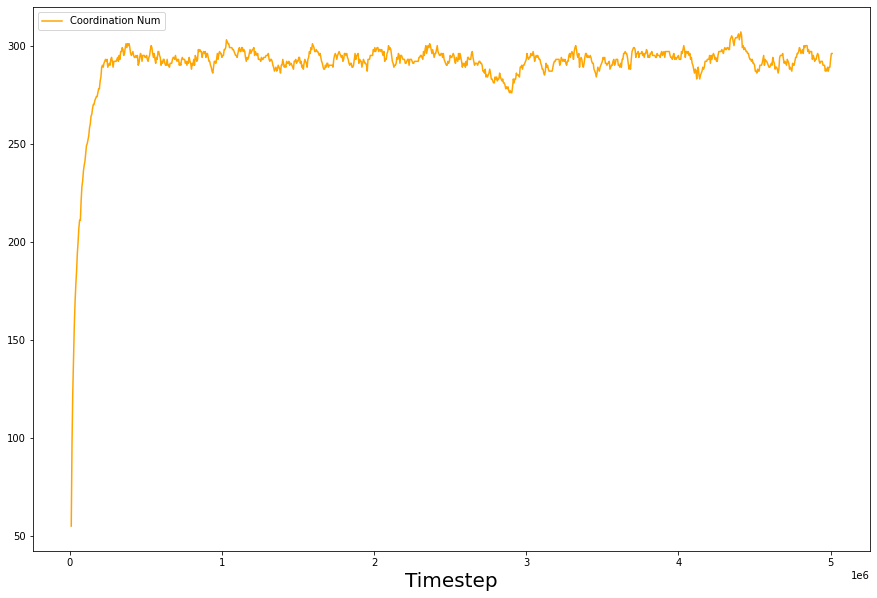

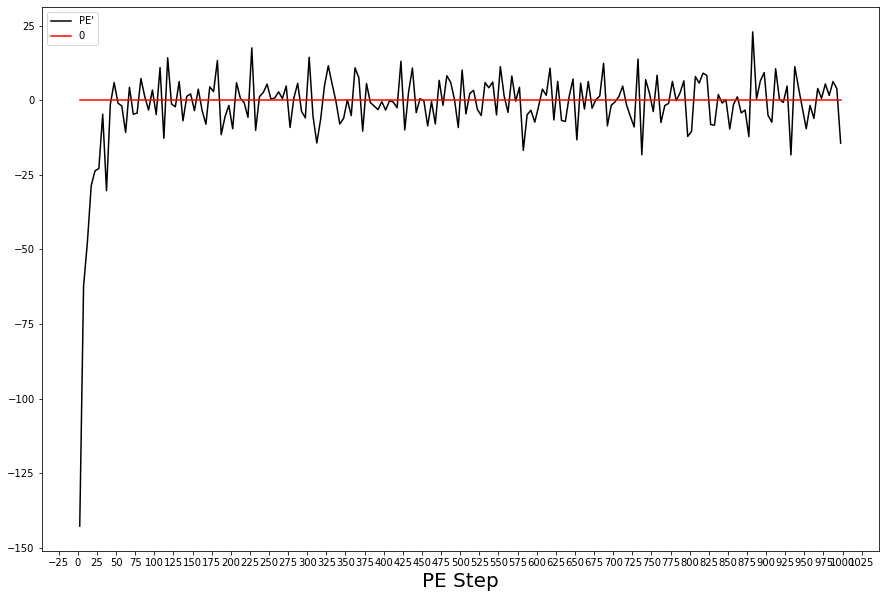

[[ 43.45230148]
 [ 51.79248869]
 [ 66.07312042]
 [ 69.89555695]
 [ 79.36922216]
 [ 88.8468266 ]
 [ 94.9647596 ]
 [ 99.56691256]
 [104.03380749]
 [109.8060263 ]
 [114.86600457]
 [122.0899732 ]
 [128.79949151]
 [134.87663364]
 [141.70655053]
 [149.38858802]
 [154.92467166]
 [160.09167709]
 [170.71076209]
 [185.17694275]
 [205.60294457]
 [214.76185615]
 [223.73203509]
 [230.67295867]
 [236.96122403]
 [274.21326736]
 [282.12436404]
 [290.51779213]
 [298.95407719]
 [306.14574334]
 [320.37464593]
 [337.18947154]
 [352.38868325]
 [352.63123928]
 [359.11409817]
 [369.59804349]
 [375.75089068]
 [381.88714443]
 [418.31446019]
 [425.3315474 ]
 [431.42273409]
 [441.10857523]
 [446.94690691]
 [450.91812611]
 [470.21979527]
 [476.48347677]
 [478.35781626]
 [492.66235012]
 [499.87873688]
 [505.93376381]
 [510.86695496]
 [520.0808913 ]
 [529.83147179]
 [545.26438739]
 [549.02228537]
 [558.7340511 ]
 [564.17509785]
 [572.31068353]
 [572.84158526]
 [578.52734191]
 [604.29790852]
 [620.59464877]
 [625.04

In [230]:
### STEP 2: CALCULATE TIME TO EQ


zoom = 1.0
fatness = 5

length = len(timesteps)
assert len(timesteps) == len(thermo_data["E_pair"])
assert len(thermo_data["E_pair"]) == len(coords_data["c_coords"])

timesteps_zmd = timesteps[:int(length*zoom)]
pe_zmd = thermo_data["E_pair"][:int(length*zoom)]
coords_zmd = coords_data["c_coords"][:int(length*zoom)]
steps_zmd = steps[:int(length*zoom)]

# Plot e_pair
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps_zmd, pe_zmd, label="E_pair", color="green", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.show()
# Plot coord number
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps_zmd, coords_zmd, label="Coordination Num", color="orange", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.show()


# Fat derivatives method

# Initial xlist and ylist: full versions of PE zoomed vs. steps zoomed
# Reduce both xlist and ylist, i.e. each step is now [fatness] wide instead of one step
fat_pe = []
fat_pe_steps = []
for idx, step in enumerate(steps_zmd):
    if idx % fatness == 0:
        fat_pe_steps.append(step)
        fat_pe.append(pe_zmd[idx])
x_prime, y_prime = util.num_derivative(fat_pe_steps, fat_pe)

# Plotting
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(x_prime, y_prime, label="PE'", color="black", linestyle="solid")
ax.plot(x_prime, [0]*len(y_prime), label="0", color="red", linestyle="solid")
ax.set_xlabel("PE Step", fontsize=20)
plt.locator_params(axis='x', nbins=50)
plt.legend(loc="upper left")
plt.savefig(output + "figures/%s%d/PE_deriv.png" % (sim_type, sim_num), bbox_inches="tight")
plt.show()

# numerical intersections
x  = x_prime
y1 = y_prime
y2 = np.array([0]*len(y_prime))
xcs, _ = util.find_intercepts(x, y1, y2)

print(xcs)


approx eq2 point is  455000  which is at step  89
Average PE: -2843.2462375000005
Average Coordination Number: 292.93969298245617
std=4.358481280376076
distribution:  [291 294 296 295 292 295 295 295 294 294 295 293 292 294 295 298 300 299
 296 294 296 293 291 294 293 297 297 295 294 290 292 291 293 293 291 290
 290 293 290 290 289 291 291 291 293 294 294 293 295 293 292 293 293 290
 291 290 293 294 293 293 293 291 292 290 292 291 294 292 291 288 291 290
 293 290 295 294 292 293 298 297 298 297 297 294 296 297 296 297 294 296
 296 294 292 292 290 289 287 286 289 292 292 291 293 296 293 296 297 296
 296 294 295 295 298 298 299 303 302 301 301 299 299 299 299 298 298 297
 296 295 295 294 296 298 299 297 297 299 299 297 298 297 294 292 294 293
 294 296 298 296 297 298 298 299 295 297 296 295 296 293 293 293 292 294
 293 293 294 294 294 295 295 295 296 293 292 293 293 292 290 289 287 288
 289 287 288 290 289 288 286 290 290 293 291 289 290 289 292 291 291 292
 290 291 291 290 289 288 292 2

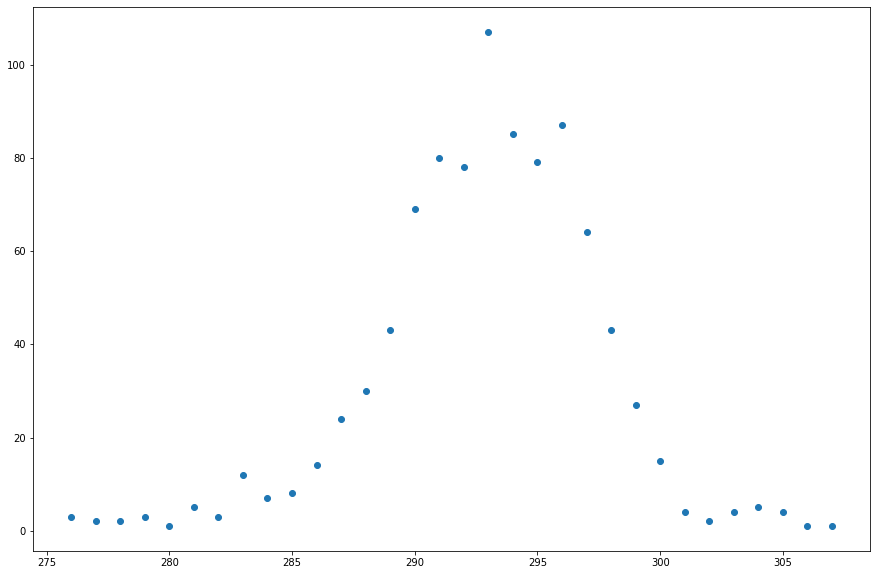

In [231]:
eq2_point = 89  # an index, the first point counted in the eq interval


timesteps = thermo_data["timestep"]
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]
coord = coords_data["c_coords"]
assert len(pe) == len(coord)
coord_steps = [i for i in range(len(coord))]


'''Calculate using 2nd EQ point'''


# Key outputs
eq2_time = timesteps[eq2_point]
print("approx eq2 point is ", str(eq2_time), " which is at step ", str(eq2_point))

pe_eq = np.delete(pe, pe_steps[:eq2_point])
avg_pe = np.average(pe_eq)
print("Average PE: " + str(avg_pe))

coord_eq = np.delete(coord, pe_steps[:eq2_point])
avg_coord = np.average(coord_eq)
print("Average Coordination Number: " + str(avg_coord))

# Uncertainty
std = np.std(coord_eq, ddof=1)
print("std=" + str(std))

import csv
print("distribution: ", coord_eq)
print("time distribution: ", np.delete(timesteps, pe_steps[:eq2_point]))
with open(output + 'out/%s%d/coord_distr.dat' % (sim_type, sim_num), 'w') as f:
    writer = csv.writer(f, delimiter=' ')
    writer.writerows(zip(np.delete(timesteps, pe_steps[:eq2_point]),coord_eq))

    
#Test Normality of the distribution of coordination number after equilibrium
x_range = np.linspace(min(coord_eq), max(coord_eq), num= max(coord_eq) - min(coord_eq) +1)
counts = []
for x in x_range:
    count = 0
    for num in coord_eq:
        if num == x:
            count += 1
    counts.append(count)
fig, ax = plt.subplots(figsize=[15, 10])
ax.scatter(x_range, counts)
plt.show()


with open(output + "out/%s%d/out.txt" % (sim_type, sim_num), "w") as text_file:
    text_file.write("approx eq2 point is " + str(eq2_time) + " which is at step " + str(eq2_point) + "\n")
    text_file.write("Average PE: " + str(avg_pe) + "\n")
    text_file.write("Average Coordination Number: " + str(avg_coord) + "\n")
    text_file.write("\n" + "std=" + str(std) + "\n")
    text_file.write("distribution: ")
    text_file.write(str(coord_eq))
    text_file.write(str(np.delete(timesteps, pe_steps[:eq2_point])))


In [232]:
# Write to consolidated file
consolidated_output = open("results/consolidated/coords_%s.dat" % sim_type, "a")  # append mode
consolidated_output.write("\n%d " % sim_num + str(avg_coord) + " " + str(std) + " " + str(eq2_time) + " " + str(sim_len))
if coords2: 
    consolidated_output.write(" " + str(avg_coord2) + " " + str(std2))
consolidated_output.close()
